# Air Quality

[Data Source](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/)  

The data is from a gas sensor array that was placed at ground level in a highly polluted section of an unnamed Italian city. 

Sensors used in this experiment were 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
air_quality = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', delimiter=';')

In [3]:
air_quality.head(3)

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN

In [4]:
print air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None


From the dtypes listed Unnamed 15 and 16 columns can be dropped. This will leave the following data for analysis:

||Name|Explination|Data Type|
|-|-|-|-|
|1|Date|Date of Measurement DD/MM/YYYY|Datetime|
|2|Time|Time Measurement was Taken|Datetime|
|3|CO(GT)|Ground Truth Carbon Monoxide Presence| Float|
|4|PT08.S1(CO)| Tin Oxide Hourly Average Sensor Response - CO target|Float| 
|5|NMHC(GT)|Ground Truth Hourly Average Non Metanic Hydrocarbons(NMHC)|Float|
|6|C6H6(GT)|Ground Truth Benzene|Float|
|7|PT08.S2(NMHC)|Titania sensor response - NMHC Targeted|Float|
|8|NOx(GT)|Ground Truth Nitrogen Dioxide|Float|
|9|PT08.S3(NOx)|Tungsten Oxide Nitrogen Oxides Targeted|Float|
|10|NO2(GT)|Ground Truth Nitrogen Dioxide|Float|
|11|PT08.S4(NO2)|Tungsten Oxide Response Nitrogen Dioxide Targeted|Float
|12|PT08.S5(O3)|Indium Oxide Response Ozone Targeted|Float| 
|13|T|Temperature (°C)|Float|
|14|RH|Relative Humidity|Float|
|15|AH|Absolute Humidity|Float|

Ground truth specifies that this reading was the true value, taken from a reference certified analytic device that was placed in the vincinity of the sensor array. The units for all ground truth readings were in $\frac{mg}{m^3}$. 

Measurements were taken each hour. The experiment ran for a little more than a year, starting March 10th, 2004 to April 4th, 2005

Non-existent values were given the value of -200. These will be replaced by NaNs for further analysis.

Create a mask to remove the unnamed columns. 

In [5]:
mask = [x for x in air_quality.columns if x not in ["Unnamed: 15", "Unnamed: 16"]]

In [6]:
air = air_quality[mask]

Now to remove all NaNs that occupy entire rows and also replace values of -200 with NaN

In [9]:
air = air.dropna(how='all')
air.tail()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
9352  04/04/2005  10.00.00    3,1       1314.0    -200.0     13,5   
9353  04/04/2005  11.00.00    2,4       1163.0    -200.0     11,4   
9354  04/04/2005  12.00.00    2,4       1142.0    -200.0     12,4   
9355  04/04/2005  13.00.00    2,1       1003.0    -200.0      9,5   
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21,9  29,3  0,7568  
9353       1269.0  24,3  23,7  0,7119  
9354       1092.0  26,9  18,3  0,6406  
9355        770.0  28,3  13,5  0,5139  
9356        816.0  28,5  13,1  0,5028

In [10]:
for column in air.columns:
    air[column] = air[column].apply(lambda x: np.NaN 
                                    if x == '-200' or x == -200 # If item is present as string or integer
                                    else x)
    
    # Commas present only as string, before converting to numeric replace with decimals
    air[column] = air[column].apply(lambda x: x.replace(',','.') if type(x)==str else x)

/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
to_nums =[x for x in air.columns if x not in ['Date', 'Time']]

In [12]:
air[to_nums] = air[to_nums].applymap(float)

/Users/sebozek/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
air.Date = pd.to_datetime(air.Date)

/Users/sebozek/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Need to convert Time into a time string

In [14]:
def hour(s):
    l = s.split('.')
    hour = int(l[0])
    return int(hour)

In [15]:
air.Time = air['Time'].apply(hour)

In [16]:
air.head()

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-10-03    18     2.6       1360.0     150.0      11.9         1046.0   
1 2004-10-03    19     2.0       1292.0     112.0       9.4          955.0   
2 2004-10-03    20     2.2       1402.0      88.0       9.0          939.0   
3 2004-10-03    21     2.2       1376.0      80.0       9.2          948.0   
4 2004-10-03    22     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [17]:
air.tail()

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9352 2005-04-04    10     3.1       1314.0       NaN      13.5         1101.0   
9353 2005-04-04    11     2.4       1163.0       NaN      11.4         1027.0   
9354 2005-04-04    12     2.4       1142.0       NaN      12.4         1063.0   
9355 2005-04-04    13     2.1       1003.0       NaN       9.5          961.0   
9356 2005-04-04    14     2.2       1071.0       NaN      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028

In [19]:
air_no_nan = air.dropna(how='any')

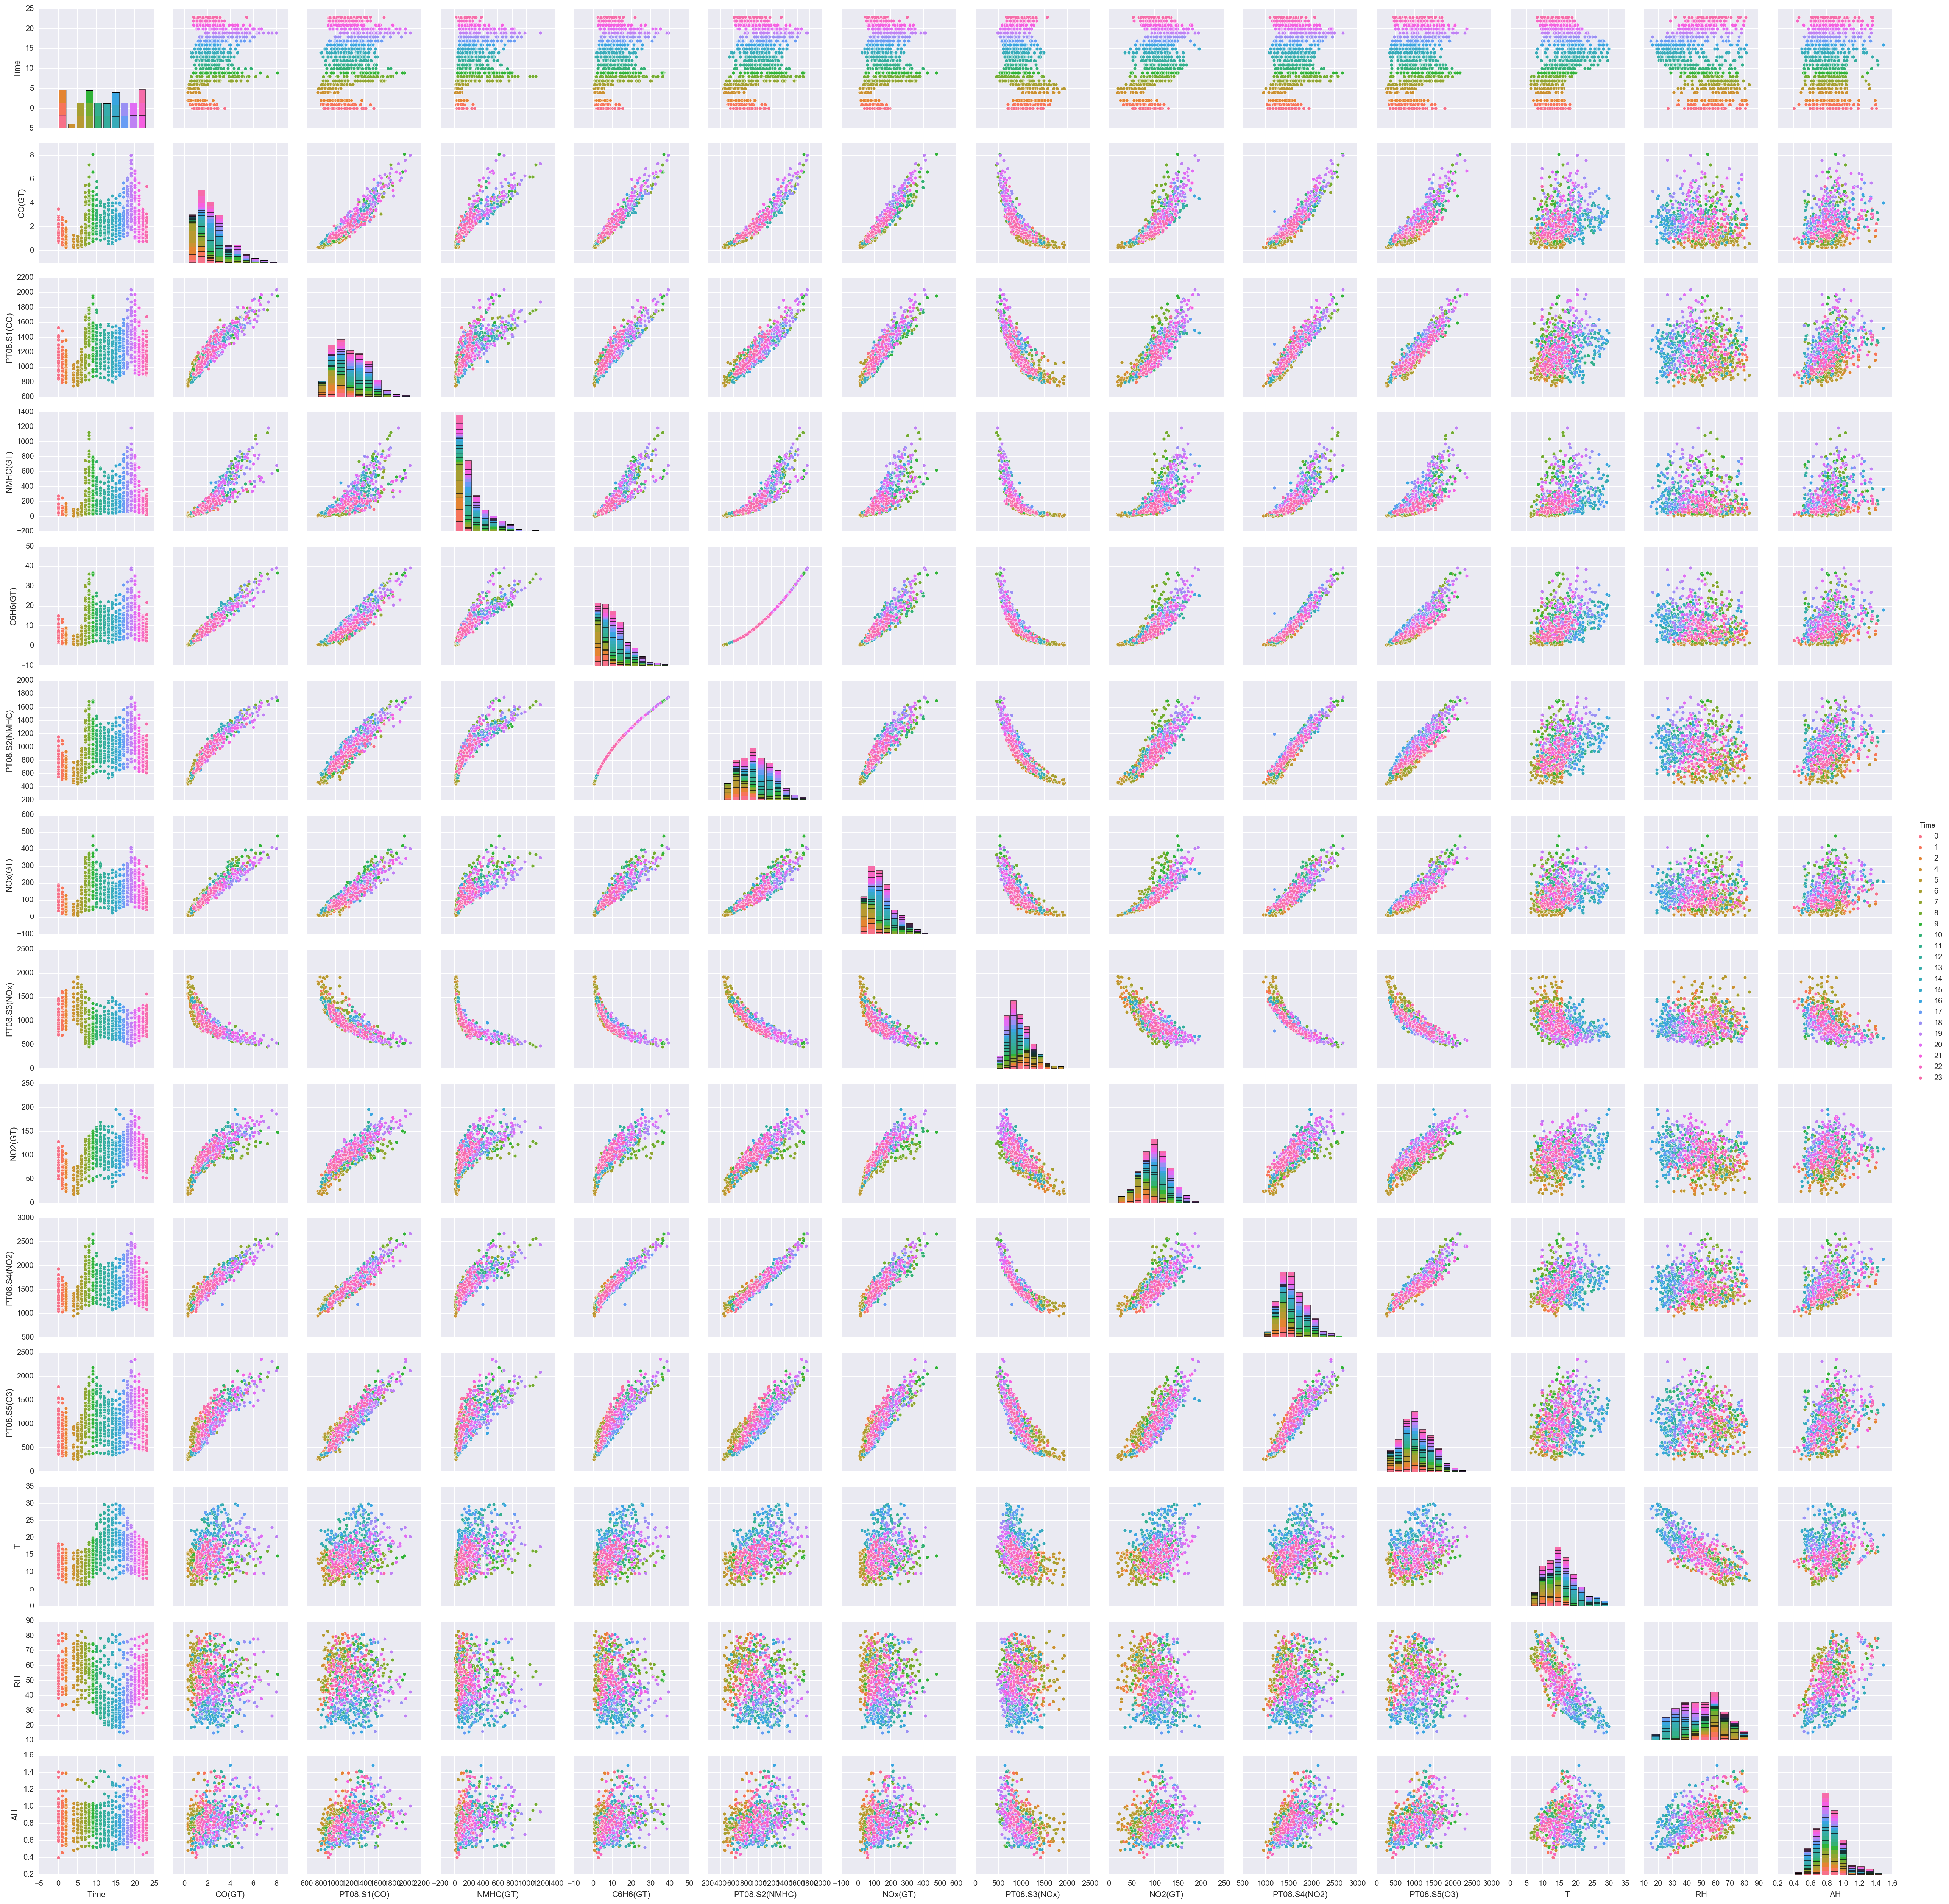

In [23]:
sns.pairplot(air_no_nan, hue='Time')